<a href="https://colab.research.google.com/github/srgari/Jupyter-Notebook-Labs/blob/master/C%C3%B3pia_de_Pycaret_Machine_Learning_for_People_with_Deadlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![# SNF Grupo de Estudos em Ciência de Dados](https://raw.githubusercontent.com/henriquepgomide/snf-grupo-de-estudos/master/assets/imgs/snl.jpeg)


# PyCaret - Aprendizagem de Máquinas para profissionais com prazo
4 de Julho de 2020 

Henrique Gomide






## 0.0 - Introdução

Olá! Nosso objetivo hoje será apresentar a biblioteca PyCaret, que facilita a 
implementação de modelos de aprendizagem de máquinas

1.   Apresentar biblioteca PyCaret
2.   Instalar PyCaret
3.   Processar dados
4.   Treinar modelos
5.   Comparar resultados dos modelos
6.   Conclusões


### Banco de dados

Iremos usar o banco de dados 'insurance' para treinar nosso modelo. Você
encontra o banco neste link: 

* https://raw.githubusercontent.com/zetta-health/exp-curso-python-saude/master/data/insurance.csv

#### Descrição do banco de dados

* age...........Idade em anos
* sex...........Sexo
* bmi...........Índice de Massa Corporal
* children ...Número de crianças 
* smoker.....Se é fumante
* region.......Região dos Estados Unidos
* charges....Sinistro em unidade monetária

## 1.0 - PyCaret, o que é?


PyCaret é uma biblioteca de código aberto e que necessita pouco código de programação para preparar seus dados e desenvolver seu modelo de aprendizagem de máquinas no seu ambiente de preferência. Ela funciona até no PowerBI :)

Para maiores detalhes, consultar o [site oficial](https://pycaret.org/). 

### Vantagens

* Pouco código para implementar algoritmos de aprendizagem supervisionada e não
supervisionada.
* Algoritmos atuais já estão incluídos (e.g., lightGBM)

### Desvantagens

* Documentação incompleta
* Filosofia baterias incluídas carregará pacotes desnecessários

## 2.0 - Instalar PyCaret

Dica: Lembre-se de usar um ambiente virtual. Versão do Python suportada oficialmente 3.6.

In [ ]:
# Instalar PyCaret
!pip install pycaret

In [ ]:
# Carregar bibliotecas
import pycaret
import numpy as np
import pandas as pd
from pycaret.regression import *
from sklearn.model_selection import train_test_split

## 3.0 Processar dados


1.   Carregar dados
2.   Separar dados para treino e teste.

In [ ]:
URL = 'https://raw.githubusercontent.com/zetta-health/exp-curso-python-saude/master/data/insurance.csv'
df = pd.read_csv(URL)
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Separar banco de dados
train, validation = train_test_split(df, test_size=0.2,
                                     random_state=42)

In [ ]:
# Regressão ou classificação?
# Documentação SETUP https://pycaret.org/setup/
# Documentação para método setup regression 
#     https://pycaret.org/regression/

reg = setup(data = train, 
              target = 'charges', 
              train_size = 0.7)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,5081
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1070, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## 4.0 Treinar e Comparar Modelos

Vamos olhar a documentação, antes de iniciar o treino.


```
compare_models(blacklist = None, fold = 10,  round = 4,  sort = ‘R2’, turbo = True)
```

Documentação: https://pycaret.org/regression/ 

In [ ]:
# Treinar modelos
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,2902.300800,25426407.075600,4994.530600,0.817000,0.458600,0.332300
1,Gradient Boosting Regressor,2946.020200,26048632.803200,5057.658500,0.813200,0.470000,0.342300
2,CatBoost Regressor,3021.542100,27038327.378200,5156.607400,0.805500,0.488300,0.354300
3,Light Gradient Boosting Machine,3235.532900,28166403.303600,5275.766900,0.795300,0.546700,0.389400
4,Random Forest,3196.054400,29860669.772700,5440.104200,0.785300,0.508900,0.374700
5,AdaBoost Regressor,4341.391200,30669085.147800,5523.198300,0.775600,0.621700,0.704900
6,Extra Trees Regressor,3209.835500,32771277.994900,5684.043800,0.763800,0.530000,0.392400
7,Lasso Least Angle Regression,4484.381400,42269261.161700,6450.195300,0.695300,0.646100,0.448900
8,Ridge Regression,4510.213400,42371213.045700,6458.350000,0.694700,0.608200,0.452800
9,Bayesian Ridge,4509.009600,42377186.797900,6458.814600,0.694600,0.604100,0.452500


In [ ]:
# Avaliar Treino
tuned_xgboost = tune_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2340.0102,2.120395e+07,4604.7744,0.8328,0.4431,0.2852
1,3030.9829,2.983702e+07,5462.3272,0.8379,0.5855,0.5607
2,3070.3794,2.918916e+07,5402.6990,0.8128,0.4955,0.3911
3,3223.1199,3.044211e+07,5517.4366,0.7963,0.4340,0.2609
4,2452.9963,2.557301e+07,5056.9759,0.6856,0.3873,0.2182
5,3183.4336,3.221815e+07,5676.1030,0.7556,0.5368,0.4176
6,3211.7610,3.220038e+07,5674.5383,0.7464,0.5988,0.4522
7,3138.4708,3.610084e+07,6008.3976,0.7780,0.4830,0.2625
8,3577.2972,3.475793e+07,5895.5853,0.7942,0.5411,0.4207
9,3951.6620,4.465247e+07,6682.2505,0.7129,0.6415,0.3409


In [ ]:
# Criar Modelo
xgboost_tuned = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2180.3500,1.557215e+07,3946.1568,0.8772,0.4040,0.2953
1,2590.1451,2.013262e+07,4486.9392,0.8907,0.4907,0.4225
2,2441.6309,1.527469e+07,3908.2846,0.9020,0.4647,0.3895
3,3051.3379,2.709878e+07,5205.6487,0.8187,0.3945,0.2554
4,2714.1328,2.527096e+07,5027.0225,0.6893,0.3949,0.2803
5,2975.9391,2.665403e+07,5162.7538,0.7978,0.4442,0.3314
6,2755.4271,2.255839e+07,4749.5671,0.8223,0.4787,0.3157
7,3336.0587,3.524750e+07,5936.9605,0.7832,0.4640,0.3258
8,3392.9133,3.096629e+07,5564.7363,0.8166,0.5149,0.4273
9,3585.0737,3.548867e+07,5957.2365,0.7718,0.5351,0.2793


In [ ]:
# Ver parâmetros do melhor modelo
print(xgboost_tuned)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=5081,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)


In [ ]:
# Avaliar parâmetros
plot_model(xgboost_tuned, plot='parameter')

,Parameters
base_score,0.5
booster,gbtree
colsample_bylevel,1
colsample_bynode,1
colsample_bytree,1
gamma,0
importance_type,gain
learning_rate,0.1
max_delta_step,0
max_depth,3


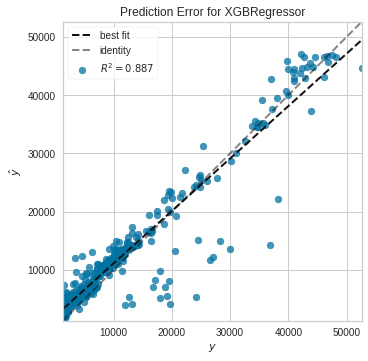

In [ ]:
# Comparar predições e resultados do banco de teste
plot_model(xgboost_tuned, plot='error')

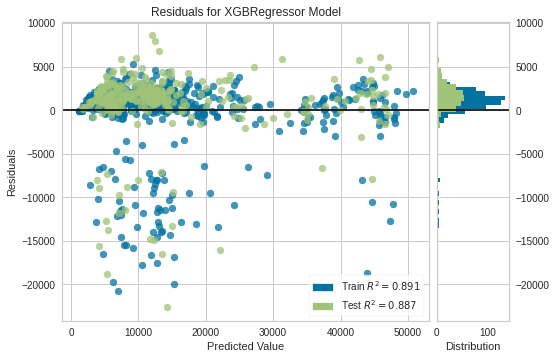

In [ ]:
# Comparar os resíduos
plot_model(xgboost_tuned, plot='residuals')

In [ ]:
evaluate_model(xgboost_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
# Interpretar o Modelo
interpret_model(xgboost_tuned)
# Damm...

AssertionError: ignored

In [ ]:
xgboost_tuned_holdout = predict_model(xgboost_tuned, data=test)

In [ ]:
print(xgboost_tuned_holdout)

     age     sex     bmi  children smoker     region      charges         Label
0     45  female  25.175         2     no  northeast   9095.06825  12913.140625
1     36  female  30.020         0     no  northwest   5272.17580   5783.449707
2     64  female  26.885         0    yes  northwest  29330.98315  28358.917969
3     46    male  25.745         3     no  northwest   9301.89355  10314.199219
4     19    male  31.920         0    yes  northwest  33750.29180  34230.425781
..   ...     ...     ...       ...    ...        ...          ...           ...
263   63    male  35.090         0    yes  southeast  47055.53210  46371.496094
264   58  female  27.170         0     no  northwest  12222.89830  13809.315430
265   38    male  28.025         1     no  northeast   6067.12675   7250.780762
266   54  female  47.410         0    yes  southeast  63770.42801  45933.187500
267   51  female  34.200         1     no  southwest   9872.70100  11045.439453

[268 rows x 8 columns]


In [ ]:
# Finalize model
final_xgboost_tuned = finalize_model(xgboost_tuned)

In [ ]:
# Save Model
save_model(final_xgboost_tuned, 'snf_saved_04072020')

Transformation Pipeline and Model Succesfully Saved


## 5.0 Conclusões

* PyCaret oferece um rápido caminho para desenvolvimento de protótipos
* No entanto, não substituí as implementações scikit.learn, numpy e pandas.

### Happy Saturday Night Fever!

![alt text](https://raw.githubusercontent.com/henriquepgomide/snf-grupo-de-estudos/master/assets/imgs/Saturday%20Night%20Fever.jpeg)